## Observations and Insights 

In [257]:
%matplotlib notebook

In [238]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [239]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [240]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'outer')


# Display the data table for preview
merged_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [241]:
# Checking the number of mice.
mice_number = len(merged_df["Mouse ID"].unique())
mice_number

249

In [242]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#time_point = merged_df["Timepoint"].value_counts()
#time_point


In [243]:
mouse_id = merged_df["Mouse ID"].value_counts()
mouse_id

g989    13
a492    10
s565    10
n364    10
j755    10
        ..
n482     1
d133     1
x336     1
u153     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [244]:
duplicate_mice_data = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_data

array(['g989'], dtype=object)

In [245]:
# Optional: Get all the data for the duplicate mouse ID. 



In [246]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_df.loc[merged_df["Mouse ID"] != "g989"]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [247]:
# Checking the number of mice in the clean DataFrame.
mice_number2 = len(clean_data_df["Mouse ID"].unique())
mice_number2

248

## Summary Statistics

In [248]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumorvolume = clean_data_df.groupby("Drug Regimen").mean()
mean_tumorvolume = mean_tumorvolume["Tumor Volume (mm3)"]
mean_tumorvolume



Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [249]:
median_tumorvolume = clean_data_df.groupby("Drug Regimen").median()
median_tumorvolume = median_tumorvolume["Tumor Volume (mm3)"]
median_tumorvolume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [250]:
var_tumorvolume = clean_data_df.groupby("Drug Regimen").var()
var_tumorvolume = var_tumorvolume["Tumor Volume (mm3)"]
var_tumorvolume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [251]:
std_tumorvolume = clean_data_df.groupby("Drug Regimen").std()
std_tumorvolume = std_tumorvolume["Tumor Volume (mm3)"]
std_tumorvolume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [252]:
sem_tumorvolume = clean_data_df.groupby("Drug Regimen").sem()
sem_tumorvolume = sem_tumorvolume["Tumor Volume (mm3)"]
sem_tumorvolume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [253]:
summarytable_1 = pd.DataFrame({"Mean Tumor Volume" : mean_tumorvolume, "Median Tumor Volume" : median_tumorvolume, "Tumor Volume Variance":var_tumorvolume, "Std. Dev. of Tumor Volume" : std_tumorvolume, "SEM of Tumor Volume" : sem_tumorvolume})
summarytable_1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Std. Dev. of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [254]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [255]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

num_regimen_measures1 = clean_data_df.groupby("Drug Regimen").count()
num_regimen_measures1 = num_regimen_measures1["Mouse ID"]
num_regimen_measures1


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


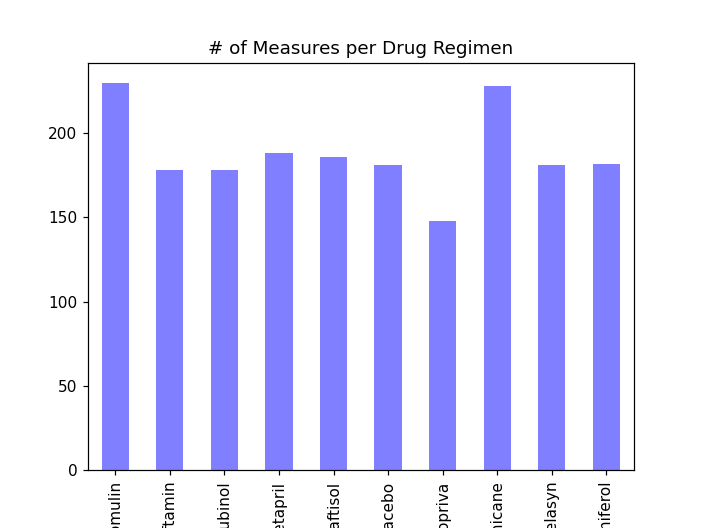

In [256]:
num_regimen_measures1.plot(kind='bar', color='b', alpha=.5, title="# of Measures per Drug Regimen")

plt.show()


In [230]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
num_regimen_measures2 = clean_data_df.groupby("Drug Regimen").count()
num_regimen_measures2 = num_regimen_measures2["Mouse ID"]
num_regimen_measures2


#x_axis = num_regimen_measures2.index
#y_axis = num_regimen_measures2
#plt.bar(x_axis, y_axis, color='b', alpha=.5, align='center')



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [234]:
x_axis = num_regimen_measures2.index
y_axis = num_regimen_measures2
plt.bar(x_axis, y_axis, color='b', alpha=.5, align='center')
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
